In [1]:
import sys
sys.path.append('../lib')
sys.path.append('../src')
sys.path.append('../src/queries')
sys.path.append('../src/clustering')
sys.path.append('../data')
sys.path.append('../')

%matplotlib inline

from lib import csv_reader as reader
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

from lib import year_classifier as year_classifier

from jinja2 import Environment, FileSystemLoader

In [2]:
def append_mid_year(df, column='mid_year'):
    '''
    Adds a int column (default "mid_year") to the table. It is the mean (rounded up) of from_year and to_year.
    '''
    df[column] = (df['from_year']+df['to_year'])/2
    df[column] = (df['mid_year']+0.49).astype(int)
    return df


import db

#merge Data!!!
my_db = db.Db()
meta_tag_120_df = pd.merge(my_db.metadata_long_19, my_db.clusters_long_19)
#meta_tag_120_df['clusters_count'] = 4

append_mid_year(meta_tag_120_df);

Db initialized, data is now accessible. It took  0.50s reading all files


In [10]:
meta_tag_120_df

,picture_id,metadata_name,metadata_surname,metadata_location,from_year,to_year,cluster_id,cluster_rank,mid_year
0,5988,Paul,Gauguin,Chicago (Illinois),1892,1892,31,1,1892
1,5988,Paul,Gauguin,Chicago (Illinois),1892,1892,63,2,1892
2,5988,Paul,Gauguin,Chicago (Illinois),1892,1892,50,3,1892
3,5988,Paul,Gauguin,Chicago (Illinois),1892,1892,109,4,1892
4,5989,Paul,Gauguin,Chicago (Illinois),1891,1891,102,1,1891
5,5989,Paul,Gauguin,Chicago (Illinois),1891,1891,31,2,1891
6,5989,Paul,Gauguin,Chicago (Illinois),1891,1891,51,3,1891
7,5989,Paul,Gauguin,Chicago (Illinois),1891,1891,64,4,1891
8,5982,Paul,Gauguin,Washington (District of Columbia),1888,1888,49,1,1888
9,5982,Paul,Gauguin,Washington (District of Columbia),1888,1888,59,2,1888


In [14]:
topics = range(0,110)
matrixAll = [None] * 110

for topicA in topics:
    print(topicA)
    picture_id_with_topic = meta_tag_120_df[meta_tag_120_df['cluster_id']==topicA]['picture_id']
    #for topicB in 
    a = meta_tag_120_df[meta_tag_120_df['cluster_id'] != topicA]

    matrix= range(0,110)
    for x in matrix:
        matrix[x] = 0

    for pic_id in picture_id_with_topic:
        pictures = a[a['picture_id']== pic_id]
        for topic_id in pictures['cluster_id']:
            matrix[topic_id] = matrix[topic_id] +1

    matrixAll[topicA] = matrix

topic_martix_df = pd.DataFrame(matrixAll)

#topic_martix_df
#topic_martix_df.describe()
#topic_martix_df.as_matrix()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109


,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,0,5,14,24,50,23,29,23,2,6,...,93,0,3,8,10,53,5,9,7,131
1,5,0,3,2,4,50,1,9,131,1,...,0,64,3,130,170,9,2,276,3,2
2,14,3,0,6,5,220,9,22,15,1,...,6,2,2,4,3,17,5,225,2,9
3,24,2,6,0,10,141,33,29,31,366,...,1,0,34,13,123,17,4,40,13,52
4,50,4,5,10,0,10,10,4,1,3,...,44,0,5,1,3,34,9,43,6,126
5,23,50,220,141,10,0,59,125,39,42,...,5,11,6,46,94,16,6,10,16,22
6,29,1,9,33,10,59,0,19,1,8,...,2,0,7,12,2,26,7,39,5,10
7,23,9,22,29,4,125,19,0,9,19,...,38,3,6,5,31,30,5,52,2,27
8,2,131,15,31,1,39,1,9,0,23,...,2,26,7,55,97,3,9,158,16,6
9,6,1,1,366,3,42,8,19,23,0,...,0,2,19,4,83,10,1,22,5,22


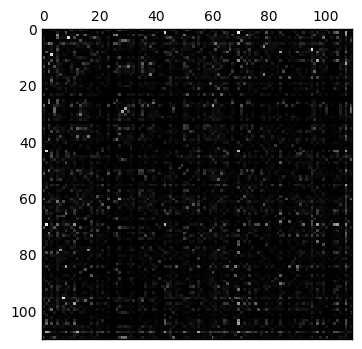

In [29]:
import matplotlib.pyplot as plt
import numpy as np



# Display a random matrix with a specified figure number and a grayscale
# colormap

fig = plt.figure(figsize=(11, 11))
plt.matshow(topic_martix_df.as_matrix(), fignum=100, cmap=plt.cm.gray)

fig.show()

In [135]:
- 

3


,topic_id,name,count
0,3,"Frau, nackt",0
1,1,"Mann, elegante Kleidung",2
2,2,"Architektur, Fassade",6
3,3,"Frau, nackt",0
4,4,"Boot, Schiff",10
5,5,"Zeichnung, Skizze",141
6,6,Pferd,33
7,7,"Geometrische Formen, abstrakt",29
8,8,Sitzmoeglichkeit,31
9,9,"Frau, nackt, nah",366


In [185]:
topic_frequently_df.sort_values('count', ascending=False)[0:8]

,topic_id,name,count
9,9,"Frau, nackt, nah",366
99,99,"Skulptur, Statue",178
18,18,Badende,150
5,5,"Zeichnung, Skizze",141
11,11,"Frau, weibliche Kleidung",127
45,45,"Frauengruppe, Damen",127
79,79,Paar,125
104,104,"Hand, Finger",123


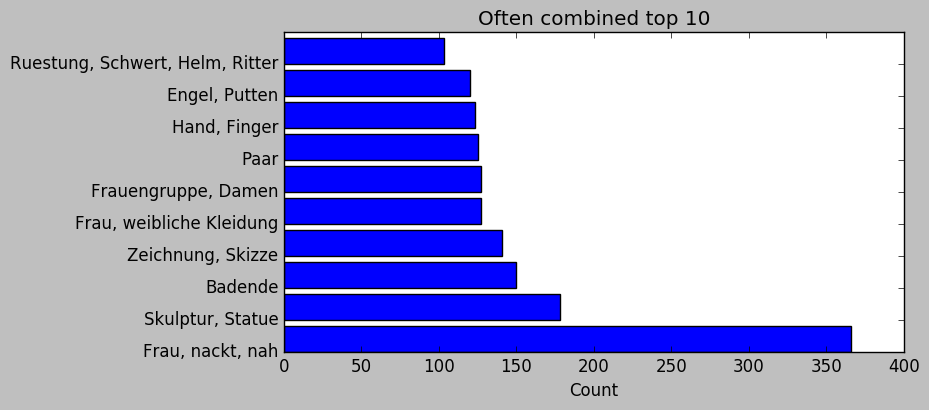

In [202]:

n = 10

df = topic_frequently_df.sort_values('count', ascending=False)[0:n]

topics= []*n

for i, x in enumerate(df['name']):
    topics.append( x)
    
y_pos = np.arange(len(topics))

count = df['count']

fig = plt.figure(figsize=(8, 4))
plt.barh(y_pos, count)
plt.yticks(y_pos, topics)
#plt.xlabel('Topic')
plt.xlabel('Count')
plt.title('Often combined top ' + str(n))
#plt.margins(0.2)
#plt.subplots_adjust(bottom=0.15)
#plt.set_xticklabels

plt.show()